### Trying out the KNN classifier on the digits dataset

In [125]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [126]:
digits_dataset = load_digits(as_frame=True)
print(digits_dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [127]:
X = digits_dataset.data
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [128]:
y = digits_dataset.target
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

In [129]:
print(f"Shape of the feature matrix: {X.shape}")
print(f"Shape of the label vector: {y.shape}")

Shape of the feature matrix: (1797, 64)
Shape of the label vector: (1797,)


In [130]:
digits_dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

So, the digits dataset has 1797 samples, each with 64 features. And using these features, we need to predict what digit is it (from 0 to 9)

### Performing the train-test split

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Trying out the KNN classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [134]:
knn.score(X_test, y_test)

0.9861111111111112

### Using GridSearchCV to figure out the best value of k

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
from sklearn.model_selection import ShuffleSplit

shuffle_cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [137]:
gs = GridSearchCV(estimator=knn,
                  param_grid=[
                      {"n_neighbors" : [1,2,3, 4, 5, 6, 7, 8, 9, 10]}
                  ],
                  cv=shuffle_cv)

gs.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}])

In [138]:
# print(gs.cv_results_)
pd.DataFrame(gs.cv_results_)[["param_n_neighbors", "params", "mean_test_score", "rank_test_score"]]

,param_n_neighbors,params,mean_test_score,rank_test_score
0,1,{'n_neighbors': 1},0.987778,2
1,2,{'n_neighbors': 2},0.985556,7
2,3,{'n_neighbors': 3},0.987222,5
3,4,{'n_neighbors': 4},0.986667,6
4,5,{'n_neighbors': 5},0.987778,2
5,6,{'n_neighbors': 6},0.987778,2
6,7,{'n_neighbors': 7},0.988333,1
7,8,{'n_neighbors': 8},0.985556,7
8,9,{'n_neighbors': 9},0.985000,9
9,10,{'n_neighbors': 10},0.984444,10


In [144]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=7)

### Making a confusion matrix

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]])

Text(50.722222222222214, 0.5, 'Truth')

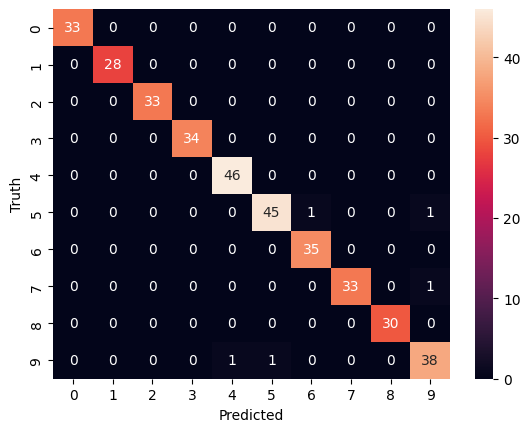

In [142]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

